In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df = pd.read_csv("D:/ML_OPS/Project-2/notebook/data/raw.csv")

df.head()

,_id,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,67f77042f976666093f1ca3c,female,group B,bachelor's degree,standard,none,72,72,74
1,67f77042f976666093f1ca3d,female,group C,some college,standard,completed,69,90,88
2,67f77042f976666093f1ca3e,female,group B,master's degree,standard,none,90,95,93
3,67f77042f976666093f1ca3f,male,group A,associate's degree,free/reduced,none,47,57,44
4,67f77042f976666093f1ca40,male,group C,some college,standard,none,76,78,75


In [3]:
X = df.drop(columns=['math_score'],axis=1)

In [4]:

X.head()

,_id,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,67f77042f976666093f1ca3c,female,group B,bachelor's degree,standard,none,72,74
1,67f77042f976666093f1ca3d,female,group C,some college,standard,completed,90,88
2,67f77042f976666093f1ca3e,female,group B,master's degree,standard,none,95,93
3,67f77042f976666093f1ca3f,male,group A,associate's degree,free/reduced,none,57,44
4,67f77042f976666093f1ca40,male,group C,some college,standard,none,78,75


In [5]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [6]:
y = df['math_score']

In [7]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [8]:

X = preprocessor.fit_transform(X)

In [9]:
X.shape

(1000, 1019)

In [10]:

# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 1019), (200, 1019))

In [11]:

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [12]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.2883
- Mean Absolute Error: 4.2364
- R2 Score: 0.8638


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.6114
- Mean Absolute Error: 5.2030
- R2 Score: 0.8132
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.2332
- Mean Absolute Error: 4.9479
- R2 Score: 0.8107


Ridge
Model performance for Training set
- Root Mean Squared Error: 2.6750
- Mean Absolute Error: 2.1334
- R2 Score: 0.9694
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.2856
- Mean Absolute Error: 4.2322
- R2 Score: 0.8639


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.8618
- Mean Absolute Error: 4.6638
- R2 Score: 0.8532
-----------------------

In [13]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.863910
0,Linear Regression,0.863771
7,CatBoosting Regressor,0.863561
5,Random Forest Regressor,0.852430
6,XGBRegressor,0.843160
8,AdaBoost Regressor,0.824183
1,Lasso,0.810743
4,Decision Tree,0.763724
3,K-Neighbors Regressor,0.758633


In [14]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 86.38


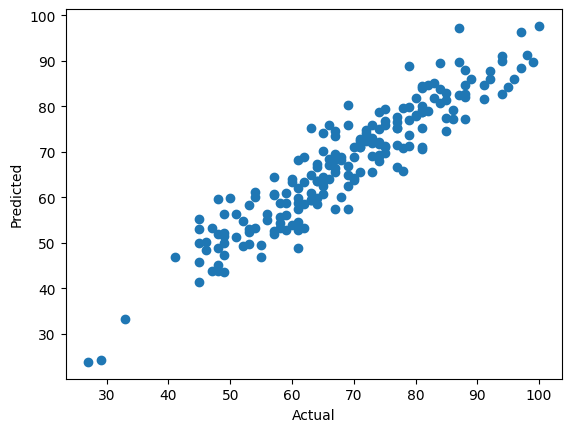

In [15]:

plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

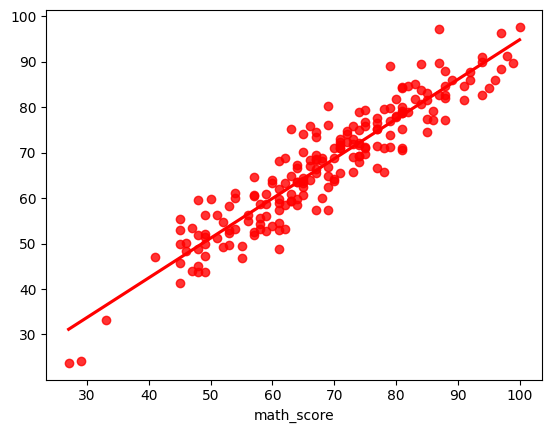

In [16]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

In [17]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,62,63.396284,-1.396284
737,92,87.813150,4.186850
740,61,59.766475,1.233525
660,52,54.766531,-2.766531
411,57,51.957250,5.042750
...,...,...,...
408,88,87.976178,0.023822
332,70,63.725351,6.274649
208,74,67.847694,6.152306
613,61,54.567644,6.432356


In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [3]:
df = pd.read_csv("D:/ML_OPS/Project-2/notebook/data/raw.csv")

In [4]:
df.head()

,_id,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,67f77042f976666093f1ca3c,female,group B,bachelor's degree,standard,none,72,72,74
1,67f77042f976666093f1ca3d,female,group C,some college,standard,completed,69,90,88
2,67f77042f976666093f1ca3e,female,group B,master's degree,standard,none,90,95,93
3,67f77042f976666093f1ca3f,male,group A,associate's degree,free/reduced,none,47,57,44
4,67f77042f976666093f1ca40,male,group C,some college,standard,none,76,78,75


In [5]:
X = df.drop(columns=['math_score'],axis=1)